<a href="https://colab.research.google.com/github/Banzanic/PSI-projekt/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# **Wczytywanie danych**

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Banzanic/PSI-projekt/main/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


# **Przetwarzanie danych**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [43]:
plt.figure(figsize=(9,3),dpi=150)
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

<Figure size 1350x450 with 0 Axes>

In [44]:
del df['classroom']
del df['student_id']
del df['gender']
df['school'] = df['school'].replace('ANKYI', 0)
df['school'] = df['school'].replace('CCAAW', 1)
df['school'] = df['school'].replace('CIMBB', 2)
df['school'] = df['school'].replace('CUQAM', 3)
df['school'] = df['school'].replace('DNQDD', 4)
df['school'] = df['school'].replace('FBUMG', 5)
df['school'] = df['school'].replace('GJJHK', 6)
df['school'] = df['school'].replace('GOKXL', 7)
df['school'] = df['school'].replace('GOOBU', 8)
df['school'] = df['school'].replace('IDGFP', 9)
df['school'] = df['school'].replace('KFZMY', 10)
df['school'] = df['school'].replace('KZKKE', 11)
df['school'] = df['school'].replace('LAYPA', 12)
df['school'] = df['school'].replace('OJOBU', 13)
df['school'] = df['school'].replace('QOQTS', 14)
df['school'] = df['school'].replace('UAGPU', 15)
df['school'] = df['school'].replace('UKPGS', 16)
df['school'] = df['school'].replace('UUUQX', 17)
df['school'] = df['school'].replace('VHDHF', 18)
df['school'] = df['school'].replace('VKWQH', 19)
df['school'] = df['school'].replace('VVTVA', 20)
df['school'] = df['school'].replace('ZMNYA', 21)
df['school'] = df['school'].replace('ZOWMK', 22)
df['school_setting'] = df['school_setting'].replace('Urban', 0)
df['school_setting'] = df['school_setting'].replace('Suburban', 1)
df['school_setting'] = df['school_setting'].replace('Rural', 2)
df['school_type'] = df['school_type'].replace('Non-public', 0)
df['school_type'] = df['school_type'].replace('Public', 1)
df['lunch'] = df['lunch'].replace('Does not qualify', 0)
df['lunch'] = df['lunch'].replace('Qualifies for reduced/free lunch', 1)
df['teaching_method'] = df['teaching_method'].replace('Standard', 0)
df['teaching_method'] = df['teaching_method'].replace('Experimental', 1)

In [45]:
df.head()

,school,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,0,0,0,20.0,0,62.0,72.0
1,0,0,0,0,20.0,0,66.0,79.0
2,0,0,0,0,20.0,0,64.0,76.0
3,0,0,0,0,20.0,0,61.0,77.0
4,0,0,0,0,20.0,0,64.0,76.0


In [46]:
df.describe()

,school,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,11.264885,0.814346,0.741678,0.356306,22.796531,0.430380,54.955931,67.102203
std,6.516660,0.793525,0.437814,0.479019,4.228893,0.495245,13.563101,13.986789
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,22.000000,32.000000
25%,6.000000,0.000000,0.000000,0.000000,20.000000,0.000000,44.000000,56.000000
50%,11.000000,1.000000,1.000000,0.000000,22.000000,0.000000,56.000000,68.000000
75%,17.000000,1.000000,1.000000,1.000000,27.000000,1.000000,65.000000,77.000000
max,22.000000,2.000000,1.000000,1.000000,31.000000,1.000000,93.000000,100.000000


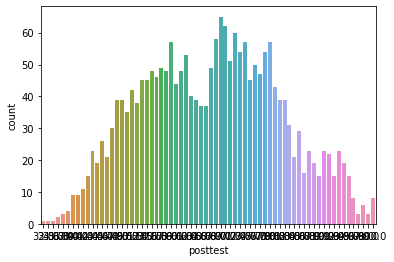

In [47]:
sns.countplot(x='posttest', data=df)

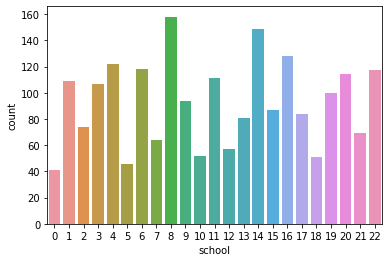

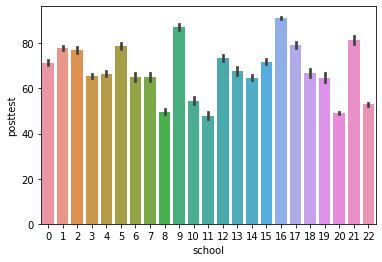

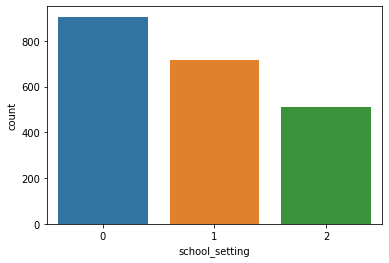

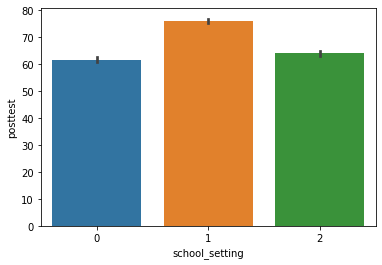

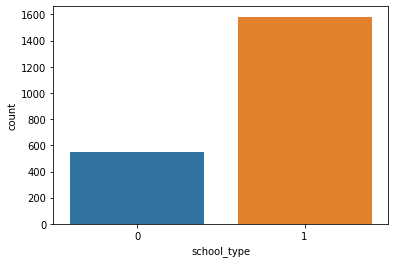

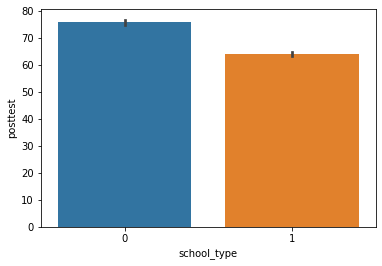

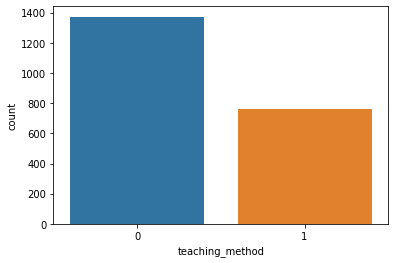

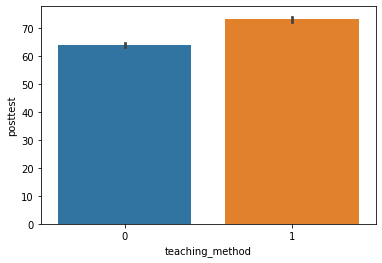

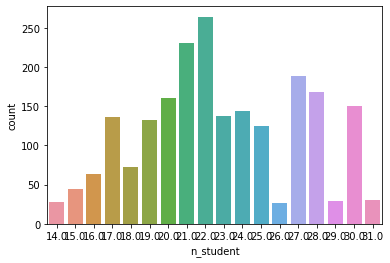

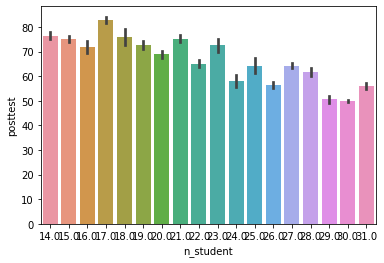

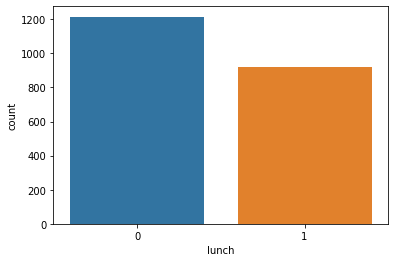

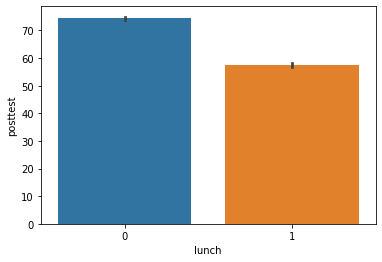

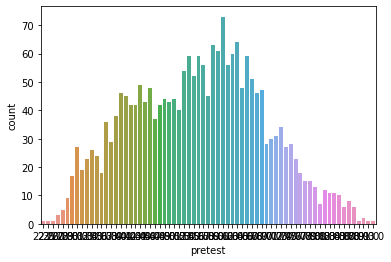

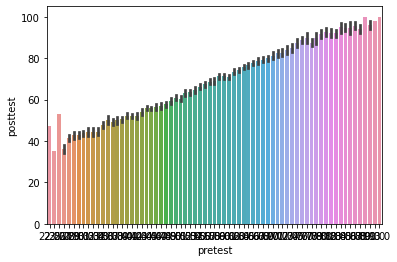

In [48]:
for column in ['school', 'school_setting', 'school_type', 'teaching_method', 'n_student', 'lunch', 'pretest']:
    sns.countplot(x=column, data=df)
    plt.show()
    sns.barplot(x=column, y='posttest', data=df)
    plt.show()

# **Modelowanie danych**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('posttest', axis=1)
y = df.posttest
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X = X_scaled

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=seed)

**Logistic Regression**

In [52]:
pipeline_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])
param_grid_1 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True) 
grid_1.fit(X_train, y_train)
grid_1.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 100, 'preprocessing': StandardScaler()}

**KNeighborsClassifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])
param_grid2 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_neighbors': [1, 2, 4, 6],
            'classifier__p': [1, 2, 4, 6],
}
grid_2 = GridSearchCV(pipeline_2, param_grid2, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__n_neighbors': 2,
 'classifier__p': 4,
 'preprocessing': StandardScaler()}

**SVC Linear**

In [53]:
pipeline3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear', probability=True))])
param_grid_3 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline3, param_grid_3, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 10, 'preprocessing': StandardScaler()}

**SVC Rbf**

In [58]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', probability=True))])
param_grid_4 = {
            'preprocessing': [StandardScaler()],
            'classifier__gamma': [ 0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 100,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

**Random Forest**

In [54]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])
param_grid_5 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [1, 5, 15, 30, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}
grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__max_leaf_nodes': 32,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

**Decision Tree**

In [55]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])
param_grid_6 = {
            'preprocessing': [StandardScaler()],
            'classifier__max_depth': [1, 5, 15, 30, 50, 100],
            'classifier__max_leaf_nodes': [2, 4, 8, 16, 32, 64],
}
grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 16,
 'preprocessing': StandardScaler()}

**Ada Boost**

In [59]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])
param_grid_7 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}
grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__learning_rate': 1,
 'classifier__n_estimators': 10,
 'preprocessing': StandardScaler()}

**Gradient Boosting**

In [60]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])
param_grid_8 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}
grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)
grid_8.fit(X_train, y_train)
grid_8.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

# **Porównywanie modeli**

In [62]:
from sklearn import metrics
models = []
models.append(('Logistic regression', grid_1.best_estimator_))
models.append(('KNeighborsClassifier', grid_2.best_estimator_))
models.append(('SVC linear', grid_3.best_estimator_))
models.append(('SVC rbf', grid_4.best_estimator_))
models.append(('RandomForestClassifier', grid_5.best_estimator_))
models.append(('DecisionTreeClassifier', grid_6.best_estimator_))
models.append(('AdaBoostClassifier', grid_7.best_estimator_))
models.append(('GradientBoostingClassifier', grid_8.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='micro')))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='micro')))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

Logistic regression
precision_score: 0.12412177985948478
recall_score: 0.12412177985948478
f1_score: 0.12412177985948478
accuracy_score: 0.12412177985948478
KNeighborsClassifier
precision_score: 0.08665105386416862
recall_score: 0.08665105386416862
f1_score: 0.08665105386416862
accuracy_score: 0.08665105386416862
SVC linear
precision_score: 0.11475409836065574
recall_score: 0.11475409836065574
f1_score: 0.11475409836065574
accuracy_score: 0.11475409836065574
SVC rbf
precision_score: 0.09836065573770492
recall_score: 0.09836065573770492
f1_score: 0.0983606557377049
accuracy_score: 0.09836065573770492
RandomForestClassifier
precision_score: 0.10304449648711944
recall_score: 0.10304449648711944
f1_score: 0.10304449648711944
accuracy_score: 0.10304449648711944
DecisionTreeClassifier
precision_score: 0.10070257611241218
recall_score: 0.10070257611241218
f1_score: 0.10070257611241216
accuracy_score: 0.10070257611241218
AdaBoostClassifier
precision_score: 0.04215456674473068
recall_score: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


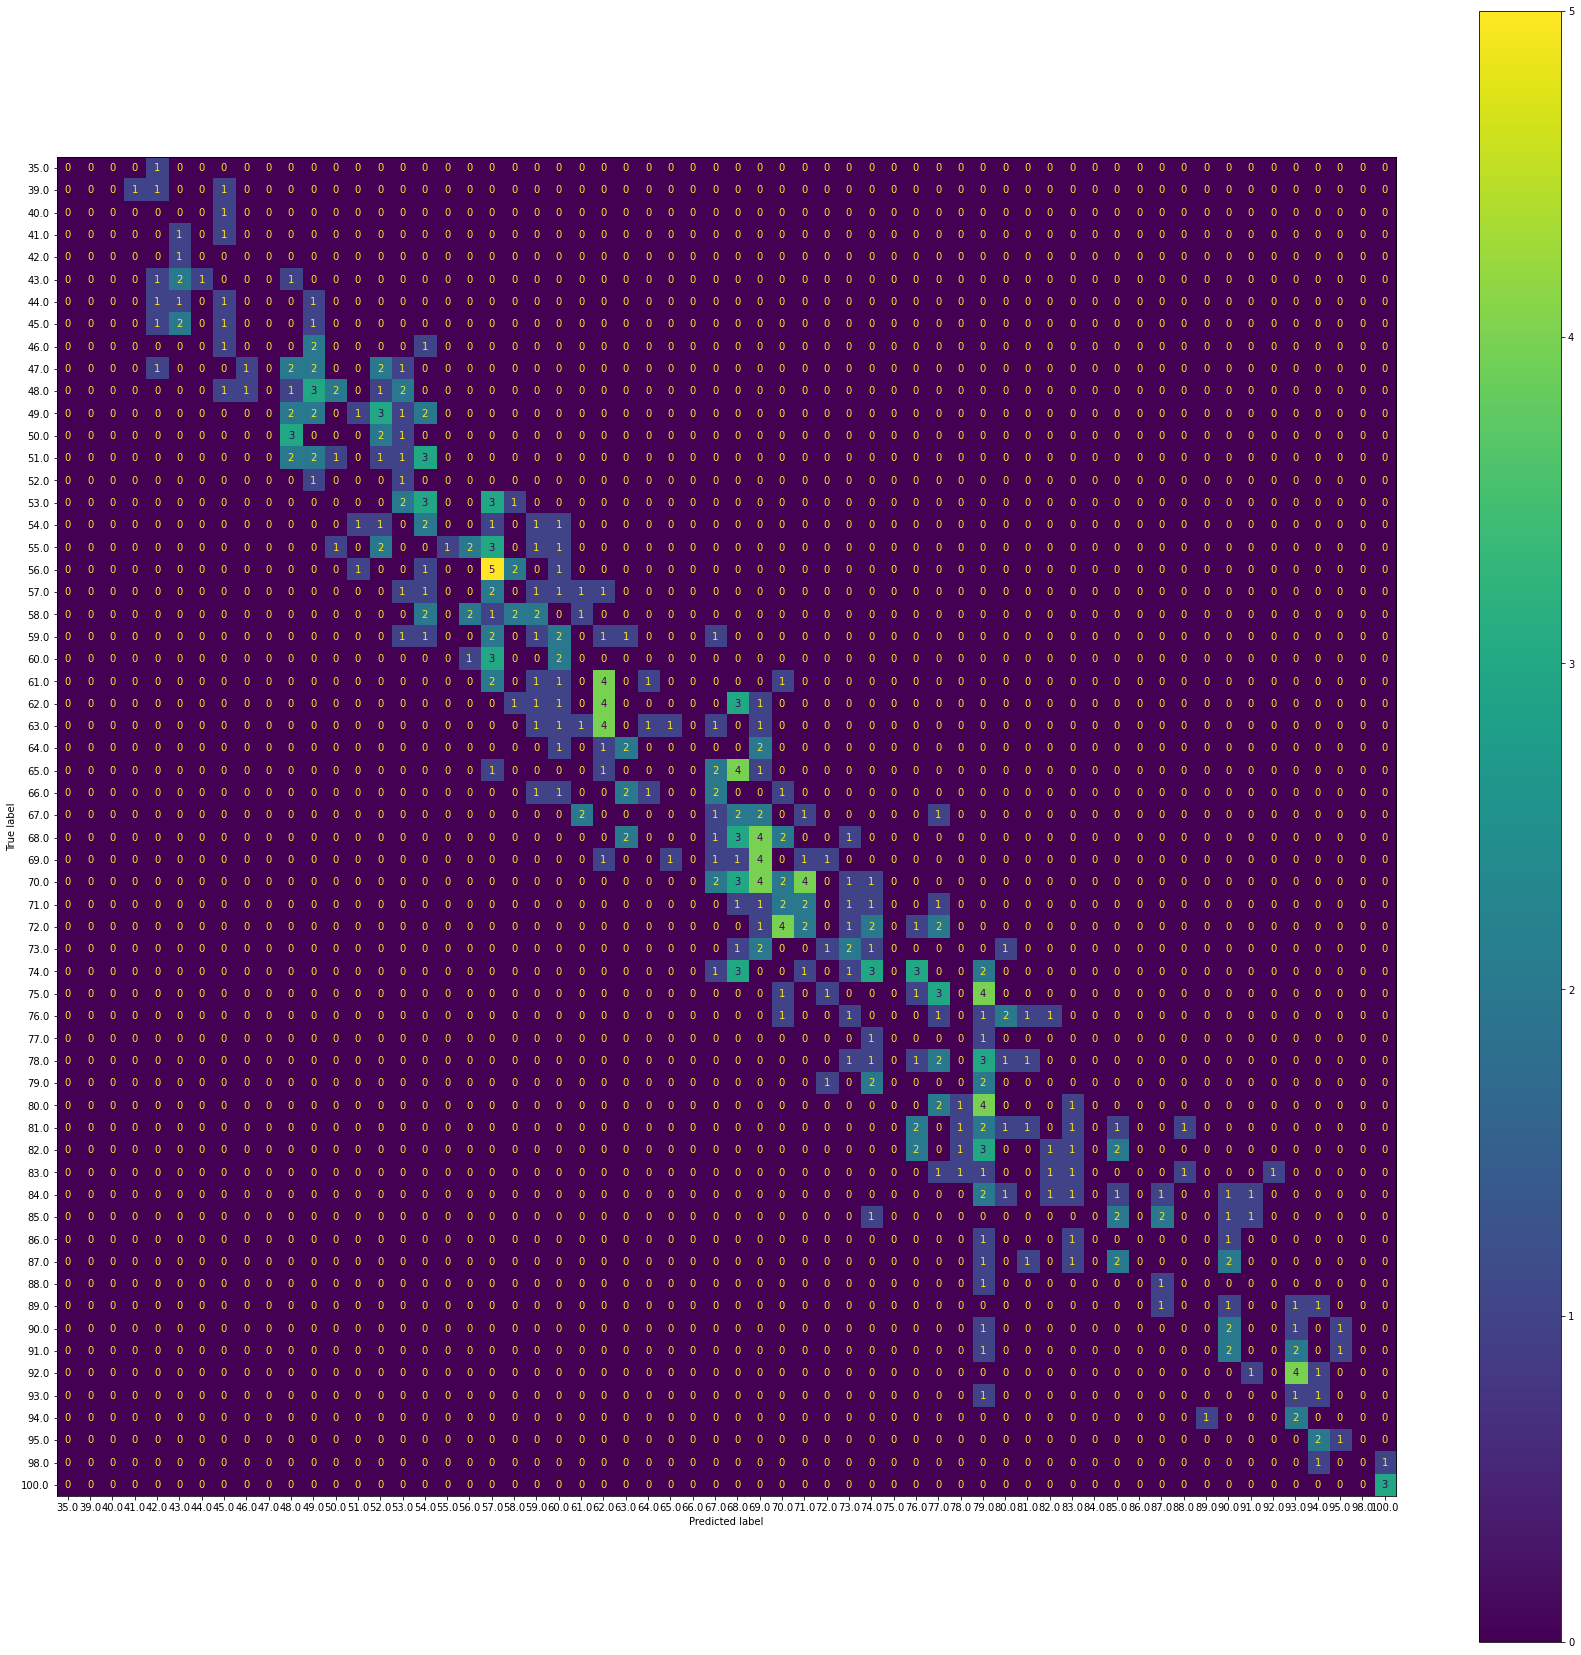

In [63]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(30, 30))
plot_confusion_matrix(grid_1, X_test, y_test, ax=ax)

# **Sieci neuronowe**

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])
param_grid_9 = {
            'preprocessing': [StandardScaler()],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500],
            'classifier__batch_size': [8, 16, 32, 64],
}
grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)
grid_9.fit(X_train, y_train)
grid_9.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

{'classifier__batch_size': 8,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 100,
 'preprocessing': StandardScaler()}

In [66]:
models=[]
models.append(('MLPClassifier', grid_9.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='micro')))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='micro')))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

MLPClassifier
precision_score: 0.11007025761124122
recall_score: 0.11007025761124122
f1_score: 0.11007025761124122
accuracy_score: 0.11007025761124122


In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras import backend

backend.clear_session()
history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,371
Trainable params: 6,371
Non-trainable params: 0
_________________________________________________________________


In [110]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [132]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/80
54/54 [==============================] - 1s 6ms/step - loss: 1.0525 - val_loss: 1.0140
Epoch 2/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0097 - val_loss: 1.0069
Epoch 3/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0056 - val_loss: 1.0045
Epoch 4/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0038 - val_loss: 1.0032
Epoch 5/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0027 - val_loss: 1.0021
Epoch 6/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0017 - val_loss: 1.0013
Epoch 7/80
54/54 [==============================] - 0s 3ms/step - loss: 1.0008 - val_loss: 1.0002
Epoch 8/80
54/54 [==============================] - 0s 3ms/step - loss: 0.9993 - val_loss: 0.9980
Epoch 9/80
54/54 [==============================] - 0s 3ms/step - loss: 0.9948 - val_loss: 0.9886
Epoch 10/80
54/54 [==============================] - 0s 3ms/step - loss: 0.9759 - val_loss: 0.9659
Epoch 11/80
54/54 [

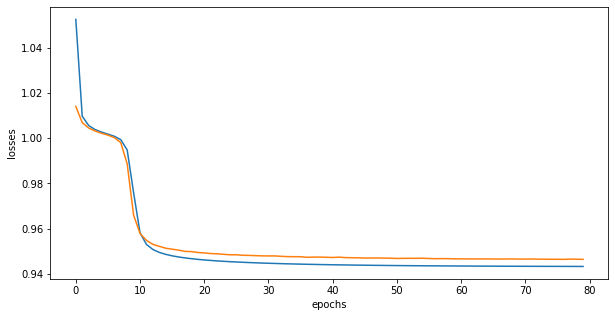

In [133]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()